In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification



In [2]:
df=pd.read_csv('2019.csv')

In [3]:
df19 = (pd.read_csv("2019.csv").rename(columns={"Overall rank": "Happiness Rank",
                                               "Country or region": "Country",
                                               " Happines Score": "Happiness Score",
                                               "GDP per capita": "GDP",
                                               "Social support": "Family",
                                               "Healthy life expectancy": "Life",
                                               "Freedom to make life choices": "Freedom",
                                               "Perceptions of corruption": "Trust"}))

In [5]:
df=pd.read_csv('2019.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2    Happiness Score              156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [6]:
df.head()

,Overall rank,Country or region,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
Happiness Score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
GDP per capita,156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
Social support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
Healthy life expectancy,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
Freedom to make life choices,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
Generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
Perceptions of corruption,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


<Axes: >

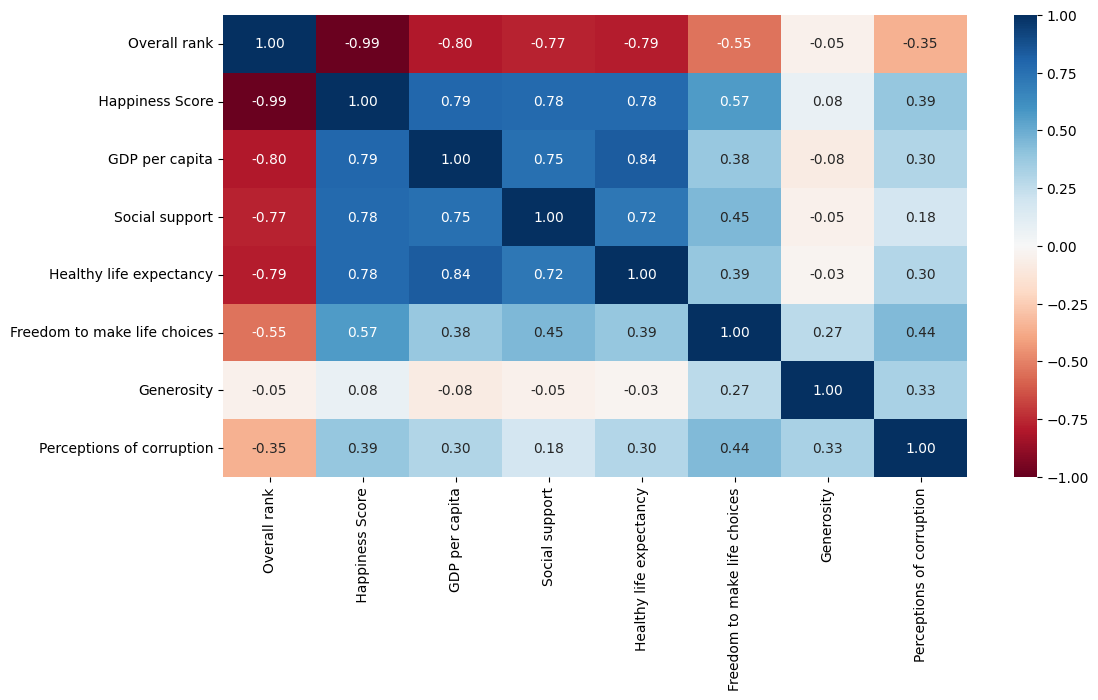

In [ ]:
numeric_df = df.select_dtypes(include='number')  # Select only numeric columns
corr = numeric_df.corr()
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap="RdBu",vmin=-1,vmax=1,fmt=".2f")

In [8]:
print(df.columns)

Index(['Overall rank', 'Country or region', ' Happiness Score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


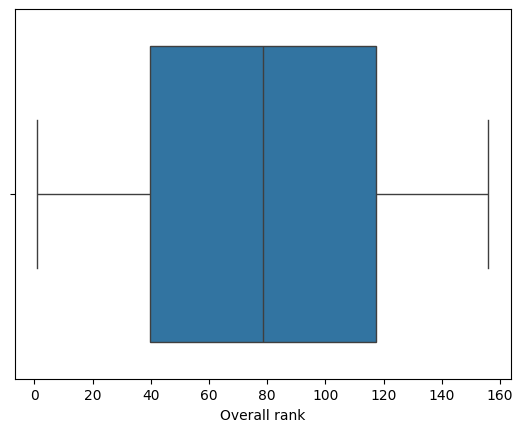

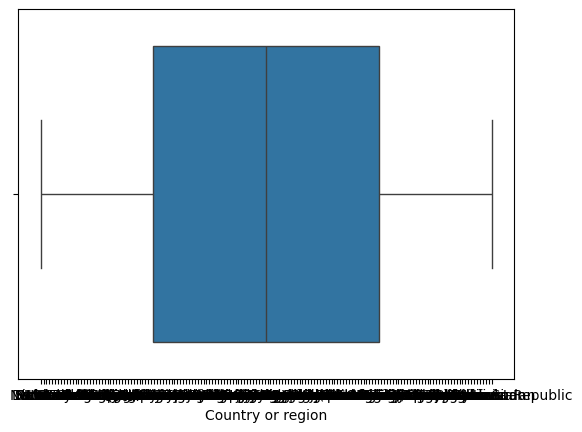

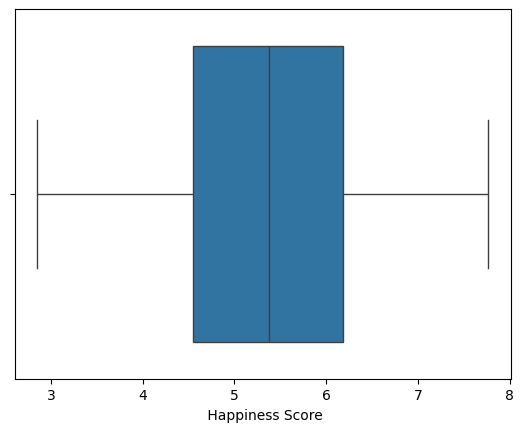

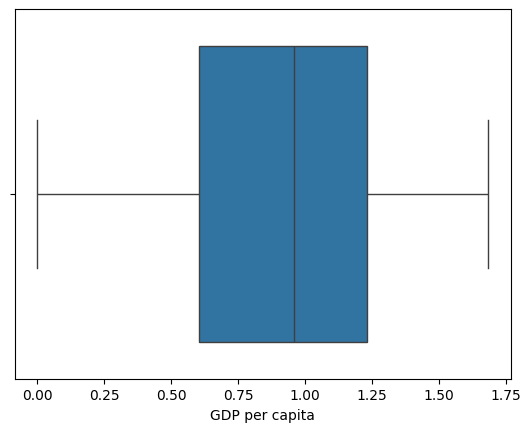

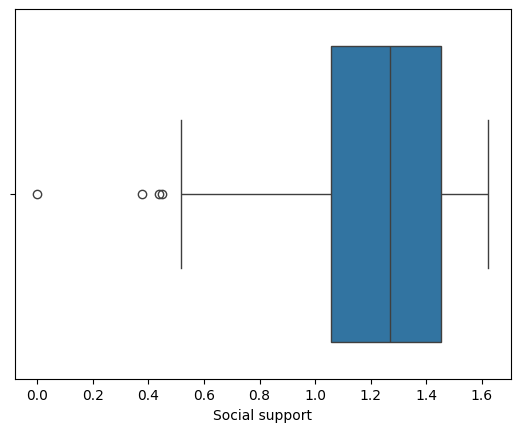

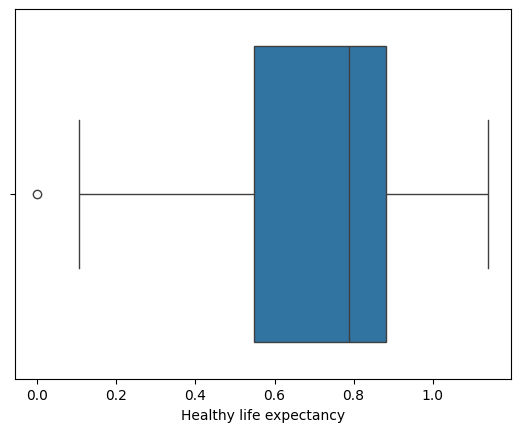

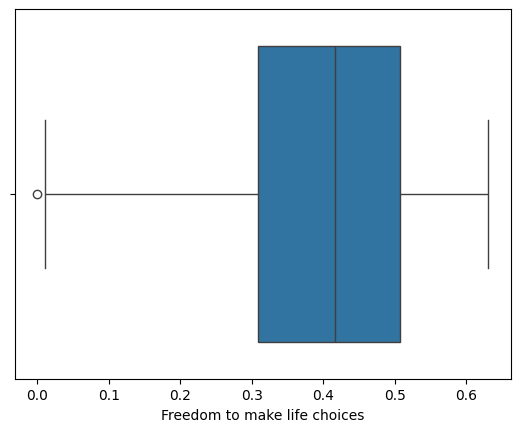

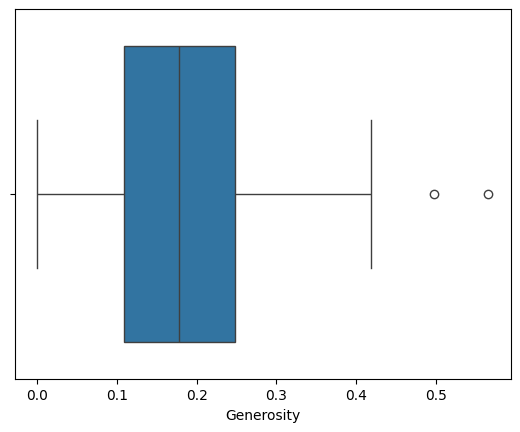

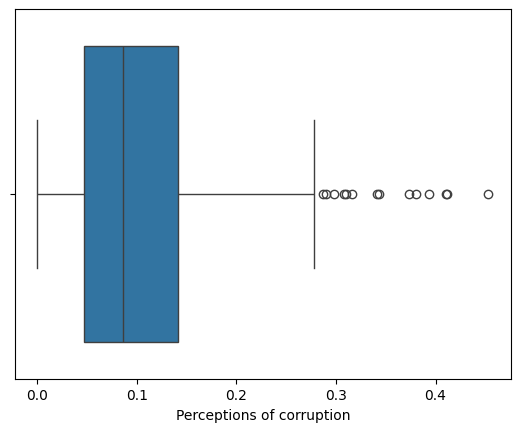

In [ ]:
column_list = ["Overall rank","Country or region"," Happiness Score","GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"]
for col in column_list:
    sns.boxplot(x = df[col])
    plt.xlabel(col)
    plt.show()

In [9]:
print(df.columns)

Index(['Overall rank', 'Country or region', ' Happiness Score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


In [ ]:
if 'Healthy life expectancy' in df.columns:
    print("Column 'Healthy life expectancy' exists in DataFrame.")
else:
    print("Column 'Healthy life expectancy' does not exist in DataFrame.")

Column 'Healthy life expectancy' exists in DataFrame.


In [10]:
IQR = df["Perceptions of corruption"].quantile(0.75) - df["Perceptions of corruption"].quantile(0.25)

lower_boundary = df["Perceptions of corruption"].quantile(0.25) - (IQR * 1.5)
upper_boundary = df["Perceptions of corruption"].quantile(0.75) + (IQR * 1.5)

df["Perceptions of corruption"]= np.where(df["Perceptions of corruption"] > upper_boundary, upper_boundary,
                       np.where(df["Perceptions of corruption"] < lower_boundary, lower_boundary, df["Perceptions of corruption"]))

<Axes: xlabel='Perceptions of corruption'>

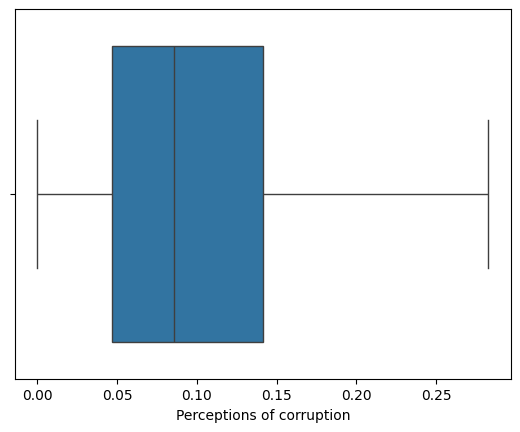

In [ ]:
sns.boxplot(data=df,x="Perceptions of corruption")

In [11]:
IQR = df["Generosity"].quantile(0.75) - df["Generosity"].quantile(0.25)

lower_boundary = df["Generosity"].quantile(0.25) - (IQR * 1.5)
upper_boundary = df["Generosity"].quantile(0.75) + (IQR * 1.5)

df["Generosity"]= np.where(df["Generosity"] > upper_boundary, upper_boundary,
                       np.where(df["Generosity"] < lower_boundary, lower_boundary, df["Generosity"]))

<Axes: xlabel='Generosity'>

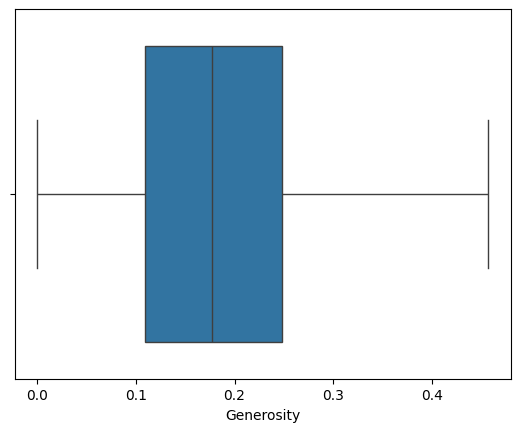

In [ ]:
sns.boxplot(data=df,x="Generosity")

In [12]:
df.isnull().sum()

Overall rank                    0
Country or region               0
 Happiness Score                0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [13]:
ndf = df.drop(columns=["Country or region","Overall rank"],axis=1)

In [14]:
ndf.head()

,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.282625
1,7.600,1.383,1.573,0.996,0.592,0.252,0.282625
2,7.554,1.488,1.582,1.028,0.603,0.271,0.282625
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118000
4,7.488,1.396,1.522,0.999,0.557,0.322,0.282625


In [15]:
ndf.shape

(156, 7)

In [16]:
from statsmodels.api import OLS

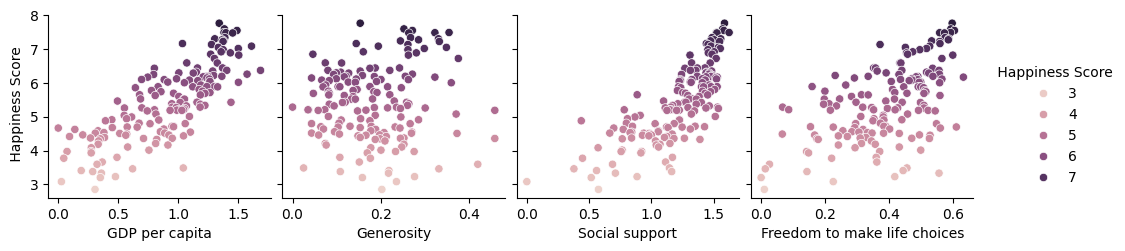

In [ ]:
sns.pairplot(
    ndf,
    x_vars=["GDP per capita","Generosity","Social support","Freedom to make life choices"],
    y_vars=[" Happiness Score"],hue=" Happiness Score"
)

In [17]:
print(OLS(endog=ndf[" Happiness Score"],exog=ndf.drop(columns=" Happiness Score")).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:        Happiness Score   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1903.
Date:                Fri, 12 Jul 2024   Prob (F-statistic):                   8.16e-139
Time:                        10:57:41   Log-Likelihood:                         -148.90
No. Observations:                 156   AIC:                                      309.8
Df Residuals:                     150   BIC:                                      328.1
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [18]:
X_train,X_test,y_train,y_test = train_test_split(ndf.drop(columns=[" Happiness Score"]),ndf[" Happiness Score"],test_size=0.12,random_state=0)

In [19]:
se = StandardScaler()

In [20]:
X_train = se.fit_transform(X_train)
X_test = se.fit_transform(X_test)

In [21]:
X_train.shape,X_test.shape

((137, 6), (19, 6))

In [22]:
y_train.shape,y_test.shape

((137,), (19,))

MODEL TRAINING

Linear Regression

In [23]:
model_le = LinearRegression()

LinearRegression()


In [24]:
model_le.fit(X_train,y_train)

LinearRegression()

In [25]:
model_le.coef_

array([0.37679995, 0.33360361, 0.20009205, 0.21921955, 0.01190689,
       0.11765904])

In [26]:
model_le.intercept_

5.392824817518248

In [27]:
le_y_pred = model_le.predict(X_test)

In [28]:
print(f"Linear Regression Train Score: {model_le.score(X_train,y_train)}")

Linear Regression Train Score: 0.8007221997581315


In [29]:
cross_v=cross_val_score(model_le,X_train,y_train,cv=10,scoring="r2").mean()

In [30]:
print(f"Cross Validation Score: {cross_v}")

Cross Validation Score: 0.7121114898282431


In [31]:
l_test_score = r2_score(y_test,le_y_pred)

In [32]:
print(f"Linear Regression Test Score: {l_test_score}")

Linear Regression Test Score: 0.5445995351717277


In [33]:
from sklearn.model_selection import GridSearchCV

# **Random** **Forest** **Regression**

In [34]:
rf_model = RandomForestRegressor()


In [35]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train,y_train)

In [36]:
print("Random Forest Model Train Score:",rf_model.score(X_train,y_train)*100)
print("RF Cross Validation Score:",cross_val_score(rf_model,X_train,y_train,cv=10,scoring="r2").mean()*100)

Random Forest Model Train Score: 97.00739995495134
RF Cross Validation Score: 73.96746594454882


In [37]:
# iris = load_iris()

In [38]:
# X = iris.data
# y = iris.target


**Random forest model overfitted**

# RF-model Tuning

In [39]:
# X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

In [40]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# rf_model = RandomForestRegressor(random_state=42)

In [43]:
# rf_params= {"max_depth": list(range(1,10)),
#              "max_features": [2,3,4,5],
            # "n_estimators": [100,200,300,400,500] }

In [44]:
# rf_cv_model = GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=2)

In [45]:
# rf_cv_model.fit(X_train,y_train)

In [46]:
# rf_cv_model.best_params_

In [47]:
# rf_tuned = RandomForestRegressor(max_depth= 9,max_features=3,n_estimators=500,random_state=42)

In [48]:
# rf_tuned.fit(X_train,y_train)

In [49]:
# rf_y_pred=rf_tuned.predict(X_test)

In [50]:
# rf_score=rf_tuned.score(X_train,y_train)
# rf_test_score= r2_score(y_test,rf_y_pred)

In [51]:
# print("Random Forest Train Score: ",rf_tuned.score(X_train,y_train))
# print("Random Forest Cross Validation Score: ",cross_val_score(rf_tuned,X_train,y_train,cv=10,scoring="r2").mean())
# print(f"Random Forest Test Score: {rf_test_score}")

In [52]:
# col_name = ndf.drop(columns=" Happiness Score",axis=1)

In [53]:
# print(col_name.columns)

In [57]:
dtr=DecisionTreeRegressor(random_state=42)

In [55]:
if 'Overall rank' in df.columns:
    print("Column 'Overall rank' exists")
else:
    for col in df.columns:
        if 'overall' in col.lower() and 'rank' in col.lower():
            print(f"Found similar column: {col}")

Column 'Overall rank' exists


In [56]:
x_train=(ndf.drop(columns=" Happiness Score"))
y_train=(ndf[" Happiness Score"])

In [58]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [59]:
x_test=(ndf.drop(columns=" Happiness Score"))
y_test=(ndf[" Happiness Score"])

In [60]:
y_train_pred=dtr.predict(x_train)
y_test_pred=dtr.predict(x_test)

#Decision tree for training data

In [61]:
r2_score(y_train,y_train_pred)*100

100.0

 #Mean square error for training data with decison tree regressor

In [62]:
mean_squared_error(y_train,y_train_pred)

0.0

In [63]:
## Decision tree for testing data

In [64]:
r2_score(y_test,y_test_pred)*100

100.0

#mean square error for testing data with decision tree regressor

In [65]:
 mean_squared_error(y_test, y_test_pred)

0.0

XG boost model

In [66]:
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
import pickle

In [67]:
xg_reg= xgb.XGBRegressor()

In [68]:
x_train = ndf.drop(columns=" Happiness Score")
y_train = ndf[" Happiness Score"]

xg_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [69]:
y_train_pred = xg_reg.predict(x_train)
y_test_pred = xg_reg.predict(x_test)

In [70]:
rf = RandomForestRegressor()  # Create a Random Forest model
rf.fit(x_train, y_train)     # Train the model

RandomForestRegressor()

In [71]:
rf.predict([[1.32629,1.32261,0.90563,0.63297,0.32957,0.45811]])



array([6.7])

In [72]:
rf.predict([[105,9,4,0.03880,1.45900,1.33095]])

array([6.70314])

In [73]:
rf.predict([[58,9,2,0.04884,1.30232,1.40223]])

array([6.70314])

## Random forest for testing data

In [74]:
r2_score(y_test,y_test_pred)*100

99.99990987010419

#Accuracy for with testing data XGboost Regression

In [75]:
r2_score(y_test,y_test_pred)*100

99.99990987010419

In [76]:
with open("World happiness report.pkl","wb") as f:
    pickle.dump(rf,f)

In [78]:
x_train.columns

Index(['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [80]:
df.head()

,Overall rank,Country or region,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.282625
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.282625
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.282625
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118000
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.282625
